1. VIẾT CHƯƠNG TRÌNH XỬ LÝ ĐIỂM ẢNH

1.1. Biến đổi cường độ ảnh

[[136 136 137 ... 122 122 123]
 [136 135 136 ... 116 125 126]
 [134 133 137 ... 122 128 123]
 ...
 [168 170 169 ... 177 174 174]
 [167 159 158 ... 171 172 177]
 [166 165 162 ... 176 174 174]]


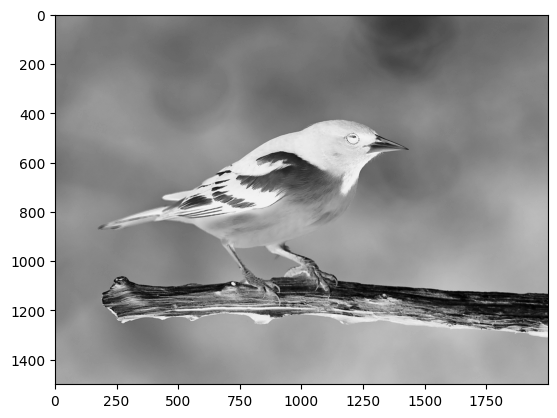

In [1]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

img = Image.open('bird.png').convert('L')
im_1 = np.asarray(img)
im_2 = 255 - im_1
print(im_2)
new_img = Image.fromarray(im_2)
img.show()
plt.imshow(new_img, cmap='gray')
plt.show()

1.2. Thay đổi chất lượng ảnh 

C:\Users\MS\AppData\Local\Temp\ipykernel_9992\2050127367.py:14: RuntimeWarning: divide by zero encountered in log
  b2 = np.log(b3) * gamma


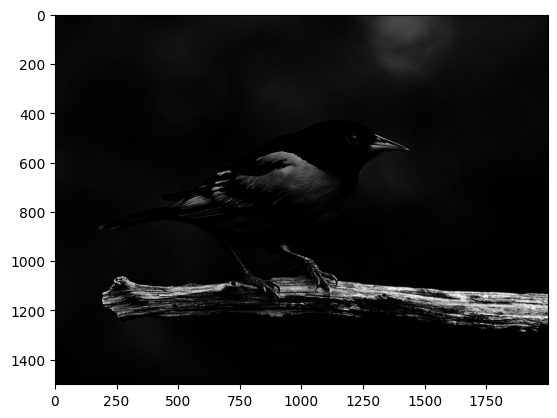

In [2]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

img = Image.open('bird.png').convert('L')
im_1 = np.asarray(img)
gamma = 5
b1 = im_1.astype(float)
b2 = np.max(b1)
b3 = b1 / b2
b2 = np.log(b3) * gamma
c = np.exp(b2) * 255.0
c1 = c.astype(int)
d = Image.fromarray(c1)
img.show()
d.show()
plt.imshow(d, cmap='gray')
plt.show()

1.3. Thay đổi cường độ điểm ảnh

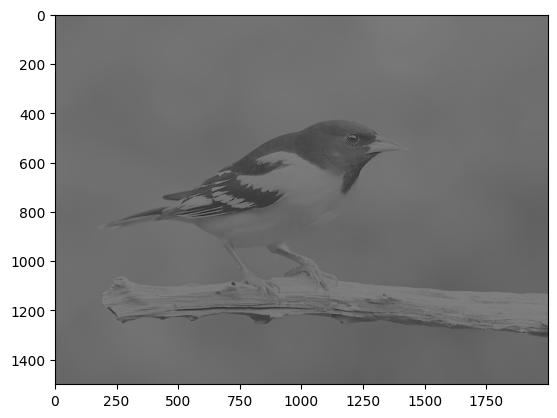

In [3]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

img = Image.open('bird.png').convert('L')
im_1 = np.asarray(img)
b1 = im_1.astype(float)
b2 = np.max(b1)
c = (128.0 * np.log(1 + b1))/np.log(1 + b2)
c1 = c.astype(int)
d = Image.fromarray(c1)
img.show()
d.show()
plt.imshow(d, cmap='gray')
plt.show()

1.4. Histogram

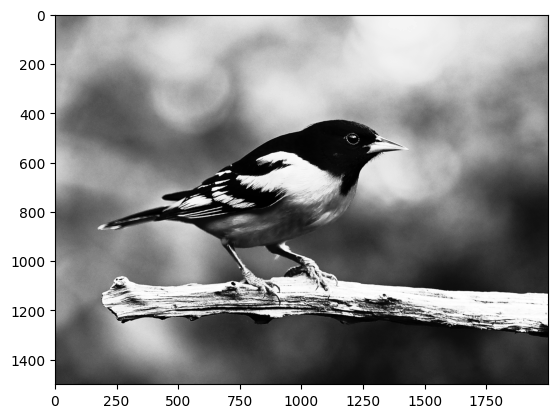

In [4]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

img = Image.open('bird.png').convert('L')
im1 = np.asarray(img)
b1 = im1.flatten()
hist, bins = np.histogram(im1, 256, [0, 255])
cdf = hist.cumsum()
cdf_m = np.ma.masked_equal(cdf, 0)
num_cdf_m = (cdf_m - cdf_m.min()) * 255
den_cdf_m = (cdf.max() - cdf_m.min())
cdf_m = num_cdf_m / den_cdf_m
cdf = np.ma.filled(cdf_m, 0).astype('uint8')
im2 = cdf[b1]
im3 = np.reshape(im2, im1.shape)
im4 = Image.fromarray(im3)
img.show()
im4.show()
plt.imshow(im4, cmap='gray')
plt.show()

1.5. Thay đổi ảnh với contrast stretching 

0 255


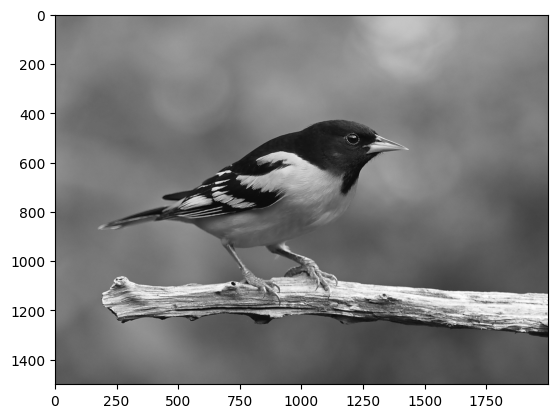

In [5]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

img = Image.open('bird.png').convert('L')
im1 = np.asarray(img)
b = im1.max()
a = im1.min()
print(a, b)
c = im1.astype(float)
im2 = 255 * (c - a) / (b - a)
im3 = Image.fromarray(im2)
img.show()
im3.show()
plt.imshow(im3, cmap='gray')
plt.show()

BT1

In [ ]:
import cv2
import numpy as np
import os
#Image inverse
def inverse(img):
    return 255 - img
#chỉnh sáng hoặc tối ảnh tùy gamma
def gamma_correction(img, gamma=5):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in range(256)]).astype("uint8")
    return cv2.LUT(img, table)
#tăng chi tiết vùng tối
def log_transform(img):
    img = img.astype(np.float32)
    img = np.log1p(img)
    img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)
    return img.astype(np.uint8)
#histogram equalization
def histogram_equalization(img):
    if len(img.shape) == 2:
        return cv2.equalizeHist(img)
    else:
        ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
        ycrcb[:, :, 0] = cv2.equalizeHist(ycrcb[:, :, 0])
        return cv2.cvtColor(ycrcb, cv2.COLOR_YCrCb2BGR)
#contrast stretching
def contrast_stretching(img):
    return cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)

methods = {
    'I': inverse,
    'G': gamma_correction,
    'L': log_transform,
    'H': histogram_equalization,
    'C': contrast_stretching
}

folder = 'exercise'
output_folder = 'output1'
os.makedirs(output_folder, exist_ok=True)

key = input("Nhấn I, G, L, H hoặc C để chọn phương pháp: ").upper()

if key in methods:
    for file in os.listdir(folder):
        if file.lower().endswith(('.jpg', '.png', '.bmp')):
            path = os.path.join(folder, file)
            img = cv2.imread(path)
            result = methods[key](img)
            save_path = os.path.join(output_folder, f"{key}_{file}")
            cv2.imwrite(save_path, result)
            #hiển thị ảnh đã biến đổi
            cv2.imshow(f"{key} - {file}", result)
            cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("Phím không hợp lệ.")
